<h1 style="background-color:yellow;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px">AGE PREDICTION</h1>


<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">OverView </h1>
<a id=0></a>

In this dataset our main objective is to predict the gender of the person by analysing his/her images. Here we have about 24k labeled examples, by using this we have to make a generalised model for predicting the gender of the person. The column pixels contains the value of pixels of the image in string format separated by a space. For gender column 0 represents 'Male' and 1 represents 'Female'.

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Importing modules and Loading datasets</h1>
<a id=1></a>

In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras 
from keras.models import Sequential
from keras.layers import BatchNormalization,MaxPool2D,Dense,Conv2D,Flatten
from keras.callbacks import EarlyStopping,LearningRateScheduler
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.
C:\Users\abhij\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\abhij\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\abhij\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\abhij\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
data=pd.read_csv('age_gender.csv')
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
def values_to_array(pixels):
    arr=np.array(pixels.split(),'float64')
    arr=arr.reshape(48,48)
#     print(arr.shape)
    return arr
data['pixels']=data['pixels'].apply(values_to_array)

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Train test spliting of data</h1>
<a id=2></a>

In [4]:
train_img,test_img,train_age,test_age=train_test_split(data['pixels'],data['age'],test_size=0.2,random_state=42)

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Data Visualization</h1>
<a id=3></a>

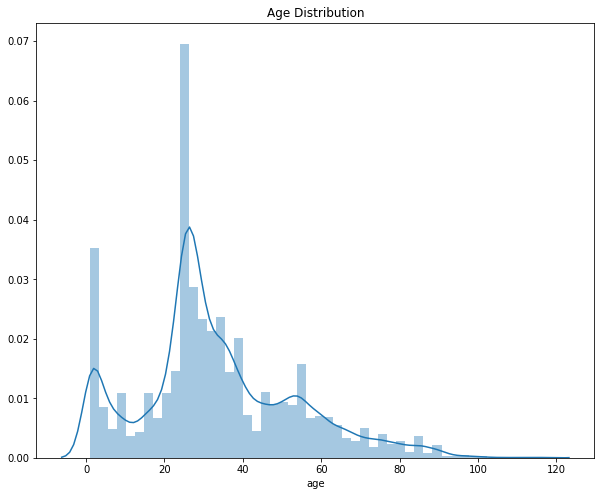

In [5]:
plt.figure(figsize=(10,8))
sns.distplot(train_age)
plt.title('Age Distribution')
plt.show()

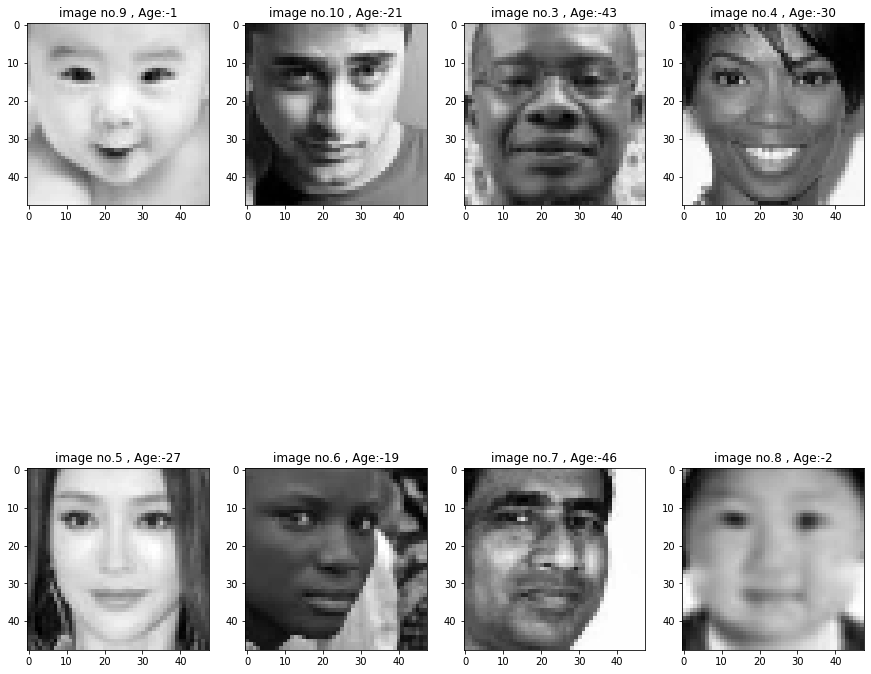

In [6]:
plt.figure(figsize=(15,15))
for i in range(0,10):
    plt.subplot(2,4,(i%8)+1)
    num=np.random.randint(1000)
    plt.title("image no.{0} , Age:-{1}".format(i+1,train_age.iloc[num]))
    plt.imshow(train_img.iloc[num],cmap='gray')
plt.show()

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Changing Dimension Of Data</h1>
<a id=4></a>

In [7]:
def change_image_dimension(data):
    data=np.reshape(data.to_list(),(len(data),48,48,1))
    return data

In [8]:
train_img=change_image_dimension(train_img)
test_img=change_image_dimension(test_img)
# train_img
train_img=train_img/255.0
test_img=test_img/255.0

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Callback Functions</h1>
<a id=5></a>

In [9]:
def schedule(epoch,lr):
    if epoch>=5:
        return 0.0001
    return 0.001
early_stop=EarlyStopping(monitor='val_mean_absolute_error',patience=2)
learning_rate_scheduler=LearningRateScheduler(schedule)

<h1 style="background-color:green;font-family:newtimeroman;font-size:400%;text-align:center;border-radius: 15px 50px;padding: 3px">Convolutional Neural Network</h1>
<a id=5></a>

In [10]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(48,48,1)))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='relu'))

In [11]:
model.compile(optimizer='adam',loss='mse',metrics=[keras.metrics.mean_absolute_error])
r=model.fit(train_img,train_age,validation_data=(test_img,test_age),epochs=15,callbacks=[learning_rate_scheduler])


Train on 18964 samples, validate on 4741 samples
Epoch 1/15


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}}]]
	 [[Mean/_219]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_1/convolution}}]]
0 successful operations.
0 derived errors ignored.

In [ ]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

In [ ]:
plt.plot(r.history['mean_absolute_error'])
plt.plot(r.history['val_mean_absolute_error'])